In [7]:
import pandas as pd
import numpy as np

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.special import expit

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import math


%matplotlib widget

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

import os
import csv

os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz\\bin\\'

directory = os.getcwd()

FOR  female
Data: 1
Accuracy: 0.734112672553165
Precision: 0.7339851652056641
Recall: 0.6174134997163925
F1-Score: 0.670671595810228
Coeffs:  [[ 0.05657049  0.03572179  0.06868549  0.49499113 -0.11827759 -0.15382681
  -0.2237933  -0.20737455  0.02264782 -3.21656914]]
Interc:  [-12.4088507]


C:\Users\benal\AppData\Local\Temp\ipykernel_8520\766109528.py:69: RuntimeWarning: invalid value encountered in divide
  histData = (histQuant*100)/histTotal


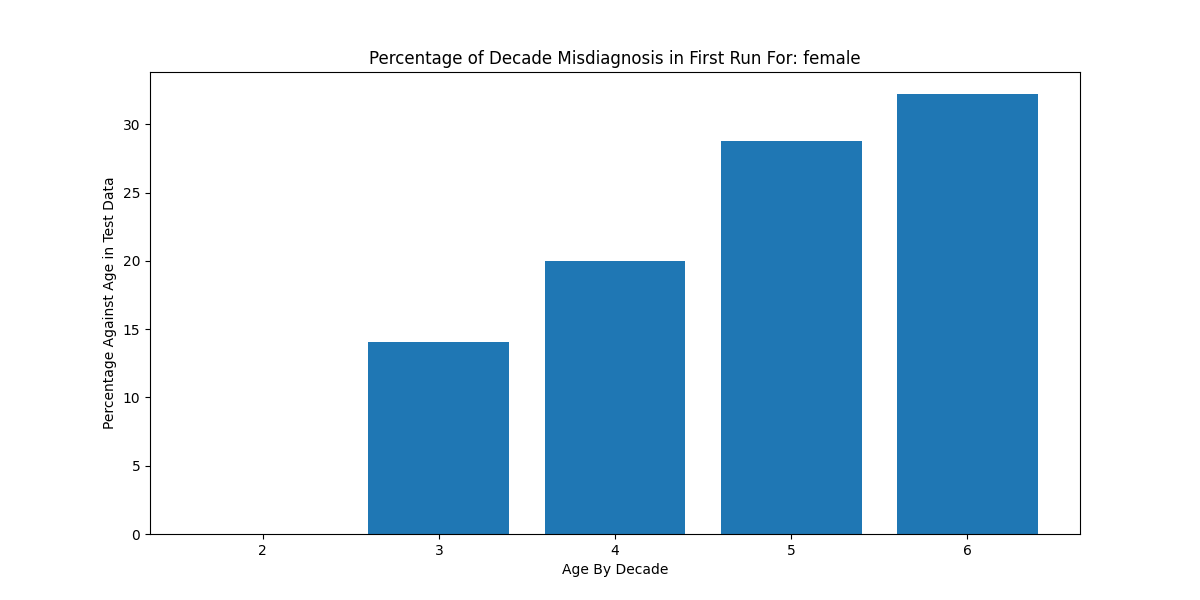

Data: 2
Accuracy: 0.7359781121751026
Precision: 0.7345907713034692
Recall: 0.6203071672354948
F1-Score: 0.6726291441788742
Data: 3
Accuracy: 0.7362268374580276
Precision: 0.7381756756756757
Recall: 0.6188048711413198
F1-Score: 0.6732398705900479
Data: 4
Accuracy: 0.7267752767068772
Precision: 0.7261507671781188
Recall: 0.612721643681396
F1-Score: 0.6646313539917571
Data: 5
Accuracy: 0.7317497823653775
Precision: 0.7285761920640214
Recall: 0.6193310657596371
F1-Score: 0.6695265818906082
Data: 6


c:\Users\benal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7224225842556896
Precision: 0.7292971468336813
Recall: 0.5904225352112676
F1-Score: 0.6525529265255293
Data: 7
Accuracy: 0.7332421340629275
Precision: 0.7506011679835108
Recall: 0.6062708102108768
F1-Score: 0.6707597851112816
Data: 8
Accuracy: 0.73485884840194
Precision: 0.7488070892978869
Recall: 0.6116369710467706
F1-Score: 0.6733067729083665
Data: 9
Accuracy: 0.734112672553165
Precision: 0.7346662148424263
Recall: 0.6153846153846154
F1-Score: 0.6697559468643806
Data: 10
Accuracy: 0.73286904613854
Precision: 0.7395762132604238
Recall: 0.6095774647887324
F1-Score: 0.6683137739345275
FOR  male
Data: 1
Accuracy: 0.7384579329739864
Precision: 0.7533718689788054
Recall: 0.6157480314960629
F1-Score: 0.677642980935875
Coeffs:  [[ 0.04454709  0.01212442  0.0633747   0.48129421 -0.12779367 -0.16292219
  -0.23498099 -0.29111317  0.03909875 -0.28212375]]
Interc:  [-12.4694304]


C:\Users\benal\AppData\Local\Temp\ipykernel_8520\766109528.py:69: RuntimeWarning: invalid value encountered in divide
  histData = (histQuant*100)/histTotal


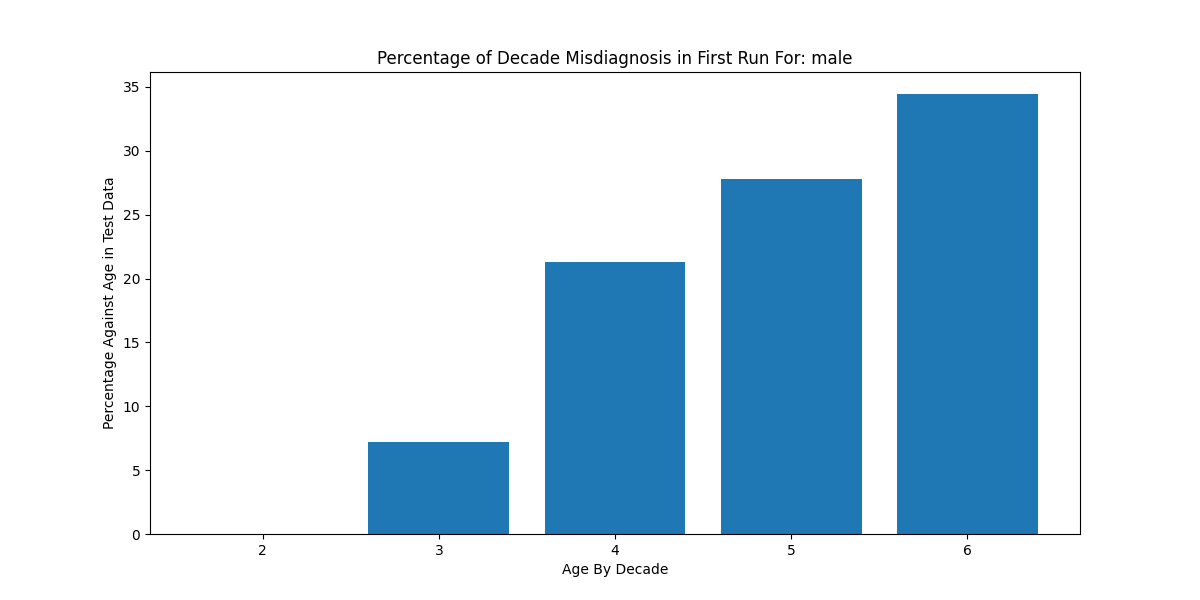

Data: 2
Accuracy: 0.7426763534098898
Precision: 0.7668161434977578
Recall: 0.6198860693940963
F1-Score: 0.6855670103092784
Data: 3
Accuracy: 0.7260370283571596
Precision: 0.7363989637305699
Recall: 0.5987361769352291
F1-Score: 0.66047051989544
Data: 4
Accuracy: 0.7272088118115773
Precision: 0.7487405541561712
Recall: 0.6084953940634595
F1-Score: 0.6713721061547149
Data: 5
Accuracy: 0.7290836653386454
Precision: 0.7391025641025641
Recall: 0.6062039957939012
F1-Score: 0.6660889659156557
Data: 6
Accuracy: 0.7459573470822592
Precision: 0.7592121982210928
Recall: 0.6289473684210526
F1-Score: 0.6879677605066206
Data: 7
Accuracy: 0.7379892195922193
Precision: 0.7538759689922481
Recall: 0.6129201680672269
F1-Score: 0.6761297798377752
Data: 8
Accuracy: 0.7419732833372393
Precision: 0.7617574257425742
Recall: 0.6322547508988187
F1-Score: 0.6909907381420151
Data: 9
Accuracy: 0.7272088118115773
Precision: 0.7573852922690132
Recall: 0.6076651538073626
F1-Score: 0.6743144935646334
Data: 10
Accuracy:

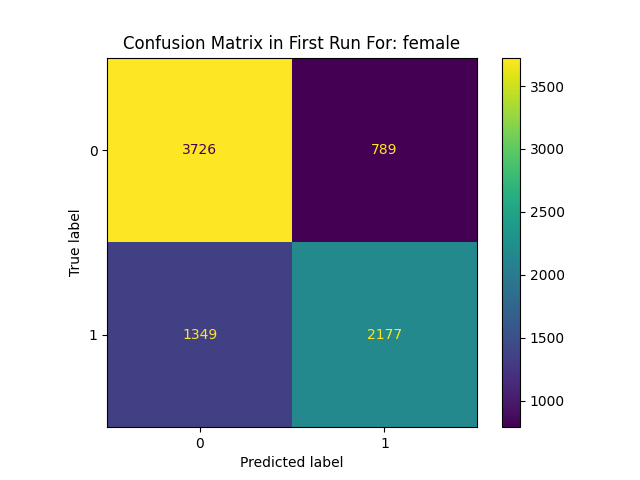

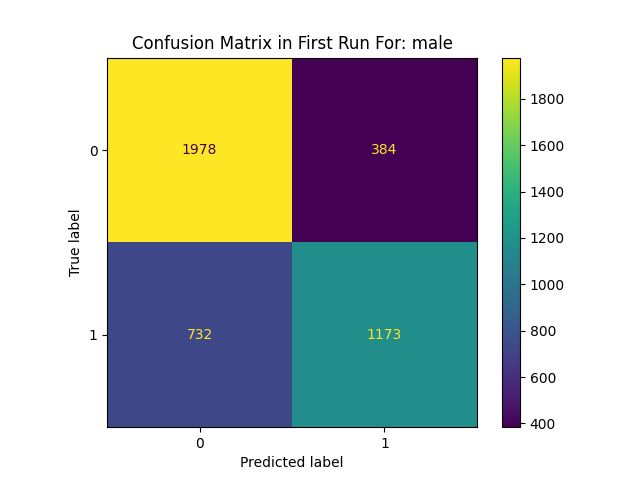

In [8]:
numberOfSets = 10

accuracy = [0.0 for x in range(1,(2*numberOfSets+1))]
precision = [0.0 for x in range(1,(2*numberOfSets+1))]
recall = [0.0 for x in range(1,(2*numberOfSets+1))]
f1score = [0.0 for x in range(1,(2*numberOfSets+1))]

for sex in ['female','male']:

    print("FOR ", sex)

    for i in range(1,(numberOfSets+1)):
        print('Data: ' + str(i))
        with open(directory+'\\..\\Data Cleaning\\'+str(sex)+'-train-'+str(i)+'.csv', 'r') as csvfile:
            dataset = list(csv.reader(csvfile))

        datasetLength = len(dataset)
        dataLabels = dataset[0]
        dataset = dataset[1:datasetLength]
        npDataset = np.array(dataset, dtype='float64')

        X_train = npDataset[:,0:(len(dataLabels)-1)]
        Y_train = npDataset[:,len(dataLabels)-1]


        with open(directory+'\\..\\Data Cleaning\\'+str(sex)+'-test-'+str(i)+'.csv', 'r') as csvfile:
            dataset = list(csv.reader(csvfile))

        datasetLength = len(dataset)
        dataLabels = dataset[0]
        dataset = dataset[1:datasetLength]
        npDataset = np.array(dataset, dtype='float64')

        X_test = npDataset[:,0:(len(dataLabels)-1)]
        Y_test = npDataset[:,len(dataLabels)-1]


        ### model
        logisticRegr = LogisticRegression(C=1e5, max_iter=1000, solver='newton-cg', tol=0.0001)
        logisticRegr.fit(X_train, Y_train)

        from sklearn.utils import check_array
        check_array(X_test, dtype='numeric')

        Y_pred = logisticRegr.predict(X_test)
        accuracy[i+numberOfSets*(sex == "male")-1] = accuracy_score(Y_test, Y_pred)
        precision[i+numberOfSets*(sex == "male")-1] = precision_score(Y_test, Y_pred, pos_label=float(1))
        recall[i+numberOfSets*(sex == "male")-1] = recall_score(Y_test, Y_pred, pos_label=float(1))
        f1score[i+numberOfSets*(sex == "male")-1] = f1_score(Y_test, Y_pred, pos_label=float(1))
        print("Accuracy:", accuracy[i+numberOfSets*(sex == "male")-1])
        print("Precision:", precision[i+numberOfSets*(sex == "male")-1])
        print("Recall:", recall[i+numberOfSets*(sex == "male")-1])
        print("F1-Score:", f1score[i+numberOfSets*(sex == "male")-1])

        if(i==1):

            print("Coeffs: ", logisticRegr.coef_)
            print("Interc: ", logisticRegr.intercept_)

            misDiag = X_test[Y_test != Y_pred]

            plt.figure(figsize=(12, 6))
            plt.title('Percentage of Decade Misdiagnosis in First Run For: '+sex)
            histData = [math.floor(int(x)/(10)) for x in misDiag[:,0]]
            histQuant, histBins = np.histogram(histData,bins=5,range=(2,7))
            histData = [math.floor(int(x)/(10)) for x in X_test[:,0]]
            histTotal, histBins = np.histogram(histData,bins=5,range=(2,7))

            histData = (histQuant*100)/histTotal
            histData = np.nan_to_num(histData, nan=0.0)

            plt.bar([2,3,4,5,6],histData)
            plt.xlabel("Age By Decade")
            plt.ylabel("Percentage Against Age in Test Data")
            plt.show()

            # Create the confusion matrix
            cm = confusion_matrix(Y_test, Y_pred)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, )
            disp.plot()
            disp.ax_.set_title("Confusion Matrix in First Run For: "+sex)

print("\nAverage:\n")
print("Accuracy:", np.mean(accuracy))
print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1-Score:", np.mean(f1score))

Data: 1
Accuracy: 0.7326724628260339
Precision: 0.7476404494382023
Recall: 0.6055697124135421
F1-Score: 0.6691472244569591
Coeffs:  [[ 0.05131853  0.01412668  0.01494169  0.06208478  0.48499778 -0.10813849
  -0.14253639 -0.20788413 -0.2356747   0.02824668 -0.45401059]]
Interc:  [-12.55380851]


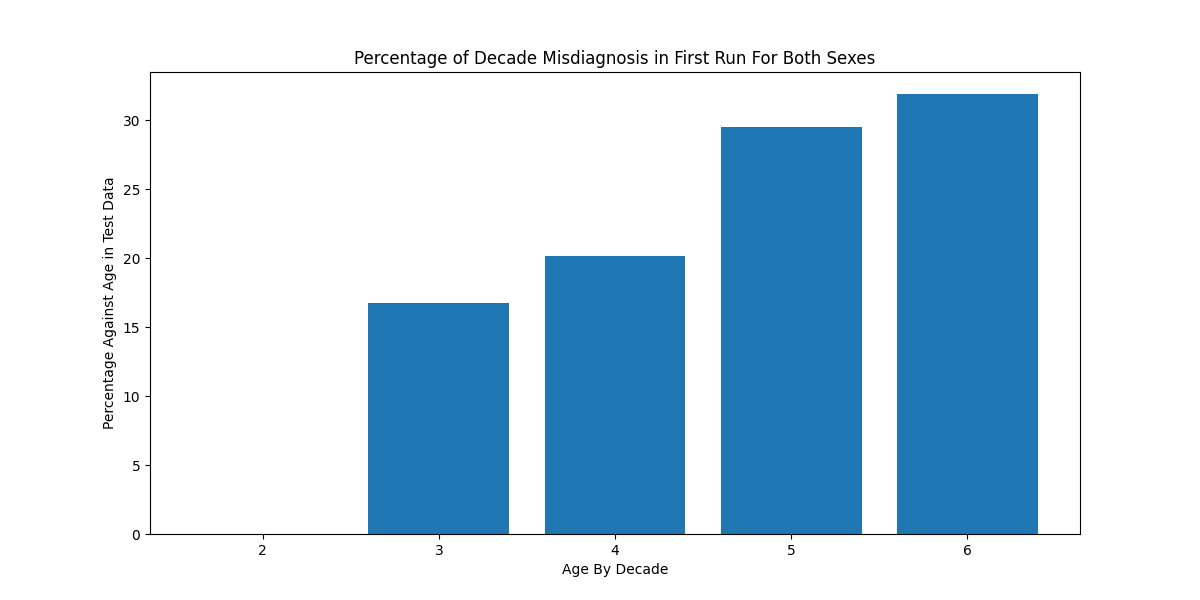

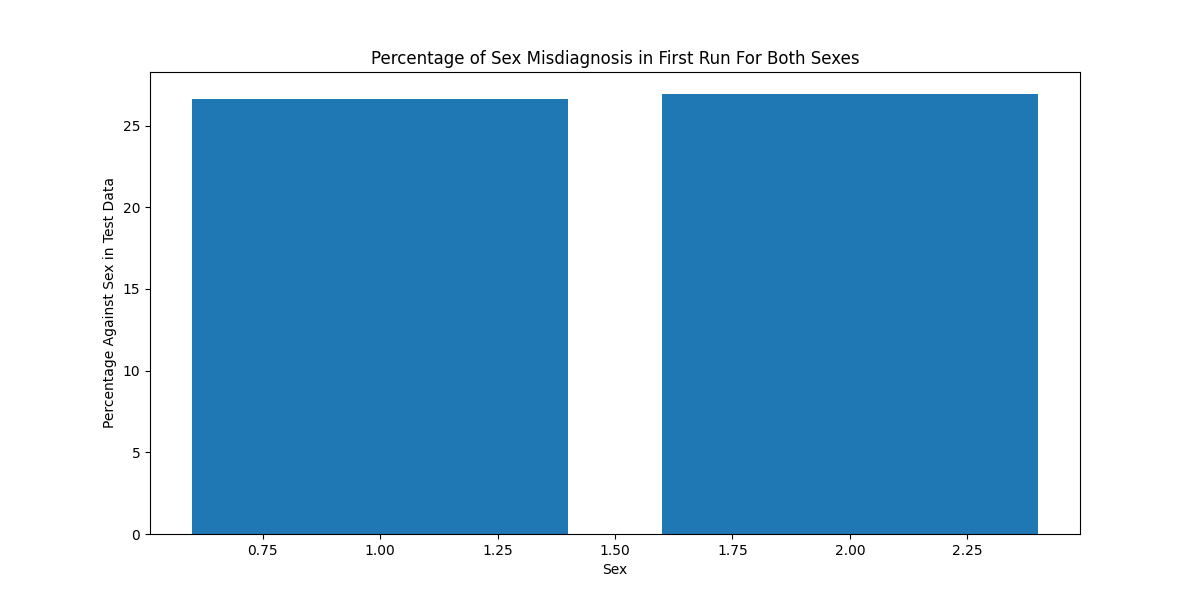

c:\Users\benal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Data: 2
Accuracy: 0.7329162265377428
Precision: 0.7471872931833223
Recall: 0.6126989869753979
F1-Score: 0.6732929132293013
Data: 3
Accuracy: 0.731047371414642
Precision: 0.7472695500218436
Recall: 0.6137423753139577
F1-Score: 0.6739558707643815
Data: 4
Accuracy: 0.7294222800032502
Precision: 0.7373160553481222
Recall: 0.6113640502640685
F1-Score: 0.6684587813620072
Data: 5
Accuracy: 0.731859917120338
Precision: 0.7369007803790413
Recall: 0.6092165898617512
F1-Score: 0.667003027245207
Data: 6
Accuracy: 0.729259770862111
Precision: 0.7401205626255861
Recall: 0.6045960240744118
F1-Score: 0.6655290102389079
Data: 7
Accuracy: 0.7355163727959698
Precision: 0.7418286219081273
Recall: 0.6168962350780532
F1-Score: 0.6736187706808383
Data: 8
Accuracy: 0.7269846428861624
Precision: 0.7332744535217487
Recall: 0.6067970034715878
F1-Score: 0.6640671865626875
Data: 9
Accuracy: 0.7300723165678069
Precision: 0.7357142857142858
Recall: 0.618
F1-Score: 0.6717391304347827
Data: 10
Accuracy: 0.729584789144

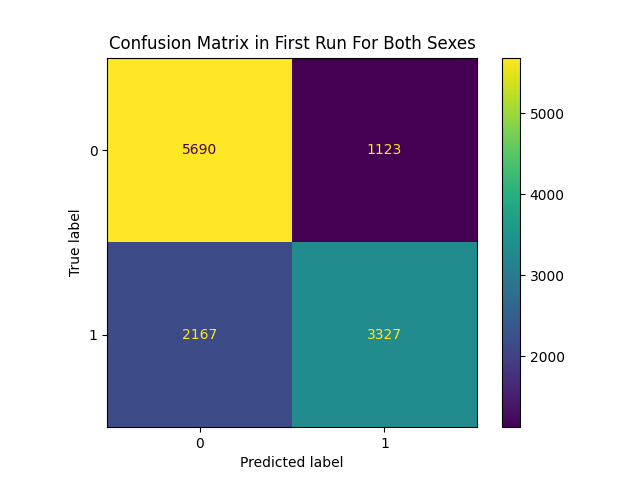

In [9]:
accuracy = [0.0 for x in range(1,(numberOfSets+1))]
precision = [0.0 for x in range(1,(numberOfSets+1))]
recall = [0.0 for x in range(1,(numberOfSets+1))]
f1score = [0.0 for x in range(1,(numberOfSets+1))]

for i in range(1,(numberOfSets+1)):
    print('Data: ' + str(i))
    with open(directory+'\\..\\Data Cleaning\\train-'+str(i)+'.csv', 'r') as csvfile:
        dataset = list(csv.reader(csvfile))

    datasetLength = len(dataset)
    dataLabels = dataset[0]
    dataset = dataset[1:datasetLength]
    npDataset = np.array(dataset, dtype='float64')

    X_train = npDataset[:,0:(len(dataLabels)-1)]
    Y_train = npDataset[:,len(dataLabels)-1]


    with open(directory+'\\..\\Data Cleaning\\test-'+str(i)+'.csv', 'r') as csvfile:
        dataset = list(csv.reader(csvfile))

    datasetLength = len(dataset)
    dataLabels = dataset[0]
    dataset = dataset[1:datasetLength]
    npDataset = np.array(dataset, dtype='float64')

    X_test = npDataset[:,0:(len(dataLabels)-1)]
    Y_test = npDataset[:,len(dataLabels)-1]


    ### model
    logisticRegr = LogisticRegression(C=1e5, max_iter=1000, solver='newton-cg', tol=0.0001)
    logisticRegr.fit(X_train, Y_train)

    from sklearn.utils import check_array
    check_array(X_test, dtype='numeric')

    Y_pred = logisticRegr.predict(X_test)
    accuracy[i-1] = accuracy_score(Y_test, Y_pred)
    precision[i-1] = precision_score(Y_test, Y_pred, pos_label=float(1))
    recall[i-1] = recall_score(Y_test, Y_pred, pos_label=float(1))
    f1score[i-1] = f1_score(Y_test, Y_pred, pos_label=float(1))
    print("Accuracy:", accuracy[i-1])
    print("Precision:", precision[i-1])
    print("Recall:", recall[i-1])
    print("F1-Score:", f1score[i-1])

    if(i==1):

        print("Coeffs: ", logisticRegr.coef_)
        print("Interc: ", logisticRegr.intercept_)
            
        misDiag = X_test[Y_test != Y_pred]

        plt.figure(figsize=(12, 6))
        plt.title('Percentage of Decade Misdiagnosis in First Run For Both Sexes')
        histData = [math.floor(int(x)/(10)) for x in misDiag[:,0]]
        histQuant, histBins = np.histogram(histData,bins=5,range=(2,7))
        histData = [math.floor(int(x)/(10)) for x in X_test[:,0]]
        histTotal, histBins = np.histogram(histData,bins=5,range=(2,7))

        histData = (histQuant*100)/histTotal
        histData = np.nan_to_num(histData, nan=0.0)

        plt.bar([2,3,4,5,6],histData)
        plt.xlabel("Age By Decade")
        plt.ylabel("Percentage Against Age in Test Data")
        plt.show()

        plt.figure(figsize=(12, 6))
        plt.title('Percentage of Sex Misdiagnosis in First Run For Both Sexes')
        histData = [int(x) for x in misDiag[:,1]]
        histQuant, histBins = np.histogram(histData,bins=2,range=(1,3))
        histData = [int(x) for x in X_test[:,1]]
        histTotal, histBins = np.histogram(histData,bins=2,range=(1,3))

        histData = (histQuant*100)/histTotal
        histData = np.nan_to_num(histData, nan=0.0)

        plt.bar([1,2],histData)
        plt.xlabel("Sex")
        plt.ylabel("Percentage Against Sex in Test Data")
        plt.show()

        # Create the confusion matrix
        cm = confusion_matrix(Y_test, Y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        disp.ax_.set_title("Confusion Matrix in First Run For Both Sexes")

print("\nAverage:\n")
print("Accuracy:", np.mean(accuracy))
print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1-Score:", np.mean(f1score))